# Regional Analysis

This notebook extends the analysis done in the first paper to a regional level.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [35]:
# read in bbNoText.csv as bbSimple
bbSimple = pd.read_csv("bbNoText.csv")

# Create new dfs by District
bbBoston = bbSimple[bbSimple['District'] == 1]
bbNewYork = bbSimple[bbSimple['District'] == 2]
bbPhiladelphia = bbSimple[bbSimple['District'] == 3]
bbCleveland = bbSimple[bbSimple['District'] == 4]
bbRichmond = bbSimple[bbSimple['District'] == 5]
bbAtlanta = bbSimple[bbSimple['District'] == 6]
bbChicago = bbSimple[bbSimple['District'] == 7]
bbStLouis = bbSimple[bbSimple['District'] == 8]
bbMinneapolis = bbSimple[bbSimple['District'] == 9]
bbKansasCity = bbSimple[bbSimple['District'] == 10]
bbDallas = bbSimple[bbSimple['District'] == 11]
bbSanFrancisco = bbSimple[bbSimple['District'] == 12]

## Test on one city

In [3]:
# Testing and training data for one district

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Split into testing and training datasets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_set, test_set = train_test_split(bbCleveland, test_size=0.2, random_state=7)

# Divide up X and Y variables in testing and training sets
X_train = train_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_train = train_set['econ_index_change_dummy']
X_test = test_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_test = test_set['econ_index_change_dummy']

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=755)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
#cv_predictions = cross_val_predict(model, X, y, cv=k)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
# rounded to 2 decimal places
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.75
Precision: 0.79
Recall: 0.93
Specificity: 0.12
AUC: 0.53
Confusion Matrix:
[[ 2 14]
 [ 4 53]]


# Balanced dataset using SMOTE

In [7]:
# Use SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Use SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Create a new dataframe with the balanced dataset
X_res = pd.DataFrame(X_res, columns=X_train.columns)
y_res = pd.DataFrame(y_res, columns=['econ_index_change_dummy'])

# Fit the model
model.fit(X_res, y_res)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
# rounded to 2 decimal places
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.62
Precision: 0.77
Recall: 0.72
Specificity: 0.25
AUC: 0.48
Confusion Matrix:
[[ 4 12]
 [16 41]]


C:\Users\MCOB PHD 14\AppData\Local\Temp\ipykernel_3196\585571671.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


# Do for all districts

In [8]:
# List to store results for each district
results = []

# Function to train and evaluate the model for each district
def evaluate_district(data, district_name):
    # Split the data into training and testing sets
    train_set, test_set = train_test_split(data, test_size=0.5, random_state=7)
    
    # Divide up X and Y variables in testing and training sets
    X_train = train_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
    y_train = train_set['econ_index_change_dummy']
    X_test = test_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
    y_test = test_set['econ_index_change_dummy']
    
    # Use SMOTE to balance the dataset
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    
    # Create the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=1985)
    
    # Fit the model
    model.fit(X_res, y_res)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store the results
    result = {
        'District': district_name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'Specificity': round(specificity, 2),
        'AUC': round(auc, 2),
        'Confusion Matrix': conf_matrix
    }
    results.append(result)

# List of districts to evaluate
districts = {
    'Boston': 1,
    'New York': 2,
    'Philadelphia': 3,
    'Cleveland': 4,
    'Richmond': 5,
    'Atlanta': 6,
    'Chicago': 7,
    'St. Louis': 8,
    'Minneapolis': 9,
    'Kansas City': 10,
    'Dallas': 11,
    'San Francisco': 12
}

# Run the evaluation for each district
for district_name, district_number in districts.items():
    district_data = bbSimple[bbSimple['District'] == district_number]
    evaluate_district(district_data, district_name)

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


         District  Accuracy  Precision  Recall  Specificity   AUC  \
0          Boston      0.76       0.93    0.76         0.76  0.76   
1        New York      0.70       0.84    0.78         0.33  0.56   
2    Philadelphia      0.76       0.87    0.83         0.50  0.66   
3       Cleveland      0.77       0.84    0.87         0.42  0.65   
4        Richmond      0.80       0.93    0.83         0.60  0.71   
5         Atlanta      0.81       0.92    0.86         0.40  0.63   
6         Chicago      0.75       0.85    0.82         0.48  0.65   
7       St. Louis      0.75       0.85    0.84         0.38  0.61   
8     Minneapolis      0.77       0.88    0.84         0.33  0.59   
9     Kansas City      0.76       0.90    0.82         0.33  0.58   
10         Dallas      0.84       0.94    0.89         0.33  0.61   
11  San Francisco      0.86       0.92    0.92         0.48  0.70   

         Confusion Matrix  
0    [[25, 8], [36, 111]]  
1   [[11, 22], [32, 116]]  
2   [[18, 18], [25

In [9]:
results_df

,District,Accuracy,Precision,Recall,Specificity,AUC,Confusion Matrix
0,Boston,0.76,0.93,0.76,0.76,0.76,"[[25, 8], [36, 111]]"
1,New York,0.70,0.84,0.78,0.33,0.56,"[[11, 22], [32, 116]]"
2,Philadelphia,0.76,0.87,0.83,0.50,0.66,"[[18, 18], [25, 119]]"
3,Cleveland,0.77,0.84,0.87,0.42,0.65,"[[17, 23], [18, 123]]"
4,Richmond,0.80,0.93,0.83,0.60,0.71,"[[15, 10], [27, 129]]"
5,Atlanta,0.81,0.92,0.86,0.40,0.63,"[[8, 12], [23, 138]]"
6,Chicago,0.75,0.85,0.82,0.48,0.65,"[[19, 21], [25, 116]]"
7,St. Louis,0.75,0.85,0.84,0.38,0.61,"[[13, 21], [24, 122]]"
8,Minneapolis,0.77,0.88,0.84,0.33,0.59,"[[9, 18], [24, 130]]"
9,Kansas City,0.76,0.90,0.82,0.33,0.58,"[[7, 14], [29, 130]]"


## Try xgBoost on full dataset

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Split the data into training and testing sets
train_set, test_set = train_test_split(bbSimple, test_size=0.2, random_state=7)

# Divide up X and Y variables in testing and training sets
X_train = train_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_train = train_set['econ_index_change_dummy']
X_test = test_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
y_test = test_set['econ_index_change_dummy']

# Use SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Create a new dataframe with the balanced dataset
X_res = pd.DataFrame(X_res, columns=X_train.columns)
y_res = pd.DataFrame(y_res, columns=['econ_index_change_dummy'])

# Create the XGBoost model
xgb_model = XGBClassifier(random_state=755)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_res, y_res)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("AUC:", round(auc, 2))
print("Confusion Matrix:")
print(conf_matrix)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.73
Precision: 0.88
Recall: 0.78
Specificity: 0.39
AUC: 0.59
Confusion Matrix:
[[ 49  78]
 [159 580]]


## EasyEnsemble

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from imblearn.ensemble import EasyEnsembleClassifier

# Read in the dataset
bbSimple = pd.read_csv("bbNoText.csv")

# List to store results for each district
results = []

# Function to train and evaluate the model for each district
def evaluate_district(data, district_name):
    # Split the data into training and testing sets
    train_set, test_set = train_test_split(data, test_size=0.2, random_state=7)
    
    # Divide up X and Y variables in testing and training sets
    X_train = train_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
    y_train = train_set['econ_index_change_dummy']
    X_test = test_set.drop(columns=['econ_index_change_dummy','econ_index', 'econ_index_change','Year','District','file_name','Date'])
    y_test = test_set['econ_index_change_dummy']
    
    # Create the EasyEnsemble model
    model = EasyEnsembleClassifier(random_state=755, n_estimators=50)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store the results
    result = {
        'District': district_name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'Specificity': round(specificity, 2),
        'AUC': round(auc, 2),
        'Confusion Matrix': conf_matrix
    }
    results.append(result)

# List of districts to evaluate
districts = {
    'Boston': 1,
    'New York': 2,
    'Philadelphia': 3,
    'Cleveland': 4,
    'Richmond': 5,
    'Atlanta': 6,
    'Chicago': 7,
    'St. Louis': 8,
    'Minneapolis': 9,
    'Kansas City': 10,
    'Dallas': 11,
    'San Francisco': 12
}

# Run the evaluation for each district
for district_name, district_number in districts.items():
    district_data = bbSimple[bbSimple['District'] == district_number]
    evaluate_district(district_data, district_name)

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


         District  Accuracy  Precision  Recall  Specificity   AUC  \
0          Boston      0.68       0.97    0.63         0.92  0.78   
1        New York      0.63       0.90    0.60         0.73  0.67   
2    Philadelphia      0.62       0.90    0.61         0.69  0.65   
3       Cleveland      0.45       0.73    0.47         0.38  0.42   
4        Richmond      0.64       0.97    0.60         0.90  0.75   
5         Atlanta      0.73       0.98    0.71         0.86  0.78   
6         Chicago      0.70       0.84    0.75         0.56  0.65   
7       St. Louis      0.50       0.86    0.49         0.55  0.52   
8     Minneapolis      0.64       0.91    0.65         0.64  0.64   
9     Kansas City      0.46       0.93    0.43         0.71  0.57   
10         Dallas      0.67       0.96    0.67         0.71  0.69   
11  San Francisco      0.79       0.95    0.82         0.57  0.69   

       Confusion Matrix  
0   [[11, 1], [22, 38]]  
1   [[11, 4], [23, 35]]  
2    [[9, 4], [23, 36]] 

# Using regional sentiment to prediction national outcomes

In [2]:
# Setting up data

# 1. Get Beige Book sentiment data
bb = pd.read_csv("bbNoText.csv")
bb['Date'] = pd.to_datetime(bb['Date'])


# 2. Get Coincident Index for U.S.
# Setting up FRED access
import pandas as pd
from fredapi import Fred
api_key = "b40f40a14d67c7903b44700db6b7b6e7"
fred = Fred(api_key=api_key)

# Series ID for Philadelphia Fed Coincident Index for the U.S.
series_id = "USPHCI"

# Get the data
data = fred.get_series(series_id)

# Set as datetime index
data.index = pd.to_datetime(data.index)

# Name columns "Date" and "USPHCI"
data = data.reset_index()
data.columns = ['Date', 'USPHCI']

In [8]:
# Drop all columns except for Date, District, and mean sentiment
bbSentiment = bb[['Date', 'District', 'mean_sentiment']]

# Create columns for each district's sentiment score
bbSentiment = pd.pivot_table(bbSentiment, values='mean_sentiment', index='Date', columns='District')

In [9]:
# Rename columns
bbSentiment.columns = ['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco', 'National Summary']

# Merge the Coincident Index data with the Beige Book sentiment data
bbSentiment = data.merge(bbSentiment, on='Date')
bbSentiment.head()

,Date,USPHCI,Boston,New York,Philadelphia,Cleveland,Richmond,Atlanta,Chicago,St. Louis,Minneapolis,Kansas City,Dallas,San Francisco,National Summary
0,1979-04-01,46.07,0.105670,0.147671,0.137726,-0.015306,0.169965,-0.078073,0.036187,0.156548,-0.087469,0.181768,0.074629,0.209491,0.132263
1,1979-06-01,46.42,-0.003252,0.064663,-0.152346,-0.038877,-0.004822,-0.002277,0.015021,0.138049,0.053891,0.148592,0.106400,0.030124,0.077302
2,1979-08-01,46.58,-0.031011,-0.030589,0.011409,0.032923,0.117866,0.096030,0.120092,0.093942,-0.127284,0.215700,0.225013,0.016887,0.085652
3,1979-09-01,46.68,-0.024409,0.131936,0.072232,0.029814,0.136607,0.065710,-0.012745,0.150029,-0.077421,0.047670,0.139470,0.116457,0.002530
4,1979-10-01,46.77,0.106649,0.051866,0.036739,0.126034,0.013673,-0.081460,-0.014033,0.173885,0.086970,0.151239,0.183164,-0.009647,0.011572


In [10]:
# Regress USPHCI on sentiment data
import statsmodels.api as sm

# Drop rows with missing values
bbSentiment = bbSentiment.dropna()

# Define X and Y variables
X = bbSentiment[['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbSentiment['USPHCI']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 USPHCI   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     13.75
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.94e-23
Time:                        15:50:52   Log-Likelihood:                -1612.3
No. Observations:                 356   AIC:                             3251.
Df Residuals:                     343   BIC:                             3301.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            71.1374      3.908     18.202      0.000      63.450      78.824
Boston           14.5275     22.094      0.658      0.511     -28.928      57.983
New York        -47.0366     19.424     -2.422      0.016     -85.243      -8.831
Philadelphia    -71.9581     20.869     -3.448      0.001    -113.006     -30.911
Cleveland       -21.8270     18.626     -1.172      0.242     -58.462      14.808
Richmond         17.9588     19.705      0.911      0.363     -20.800      56.717
Atlanta          21.2497     17.606      1.207      0.228     -13.380      55.879
Chicago          62.9809     19.577      3.217      0.001      24.474     101.488
St. Louis        21.3105     18.557      1.148      0.252     -15.189      57.810
Minneapolis      52.0049     20.493      2.538      0.012      11.697      92.313
Kansas City     146.2839     19.847      7.371      0.000     107.247     185.321
Dallas          -42.9704     19.723     -2.179      0.030     -81.764      -4.176
San Francisco    -9.1674     16.277     -0.563      0.574     -41.182      22.847
==============================================================================
Omnibus:                        3.757   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.785
Skew:                          -0.060   Prob(JB):                        0.248
Kurtosis:                       2.583   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Same as above but predicting binary outcome of USPHCI instead of level
# Drop all columns except for Date, District, and mean sentiment
bbBinary = bb[['Date', 'District', 'mean_sentiment']]

# Create columns for each district's sentiment score
bbBinary = pd.pivot_table(bbBinary, values='mean_sentiment', index='Date', columns='District')

# Rename columns
bbBinary.columns = ['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco', 'National Summary']

# Merge the Coincident Index data with the Beige Book sentiment data
bbBinary = data.merge(bbBinary, on='Date')
bbBinary.head()

# Create dummy variable for USPHCI that equals 1 if it decreased from the previous period
bbBinary['USPHCI_change'] = (bbBinary['USPHCI'] < bbBinary['USPHCI'].shift()).astype(int)

In [12]:
# This is the same approach as Table 1, column 4 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
bbBinary = bbBinary.dropna()

# Define X and Y variables
X = bbBinary[['National Summary', 'Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbBinary['USPHCI_change']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.091890
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          USPHCI_change   No. Observations:                  356
Model:                          Logit   Df Residuals:                      342
Method:                           MLE   Df Model:                           13
Date:                Tue, 09 Jul 2024   Pseudo R-squ.:                  0.6960
Time:                        15:51:05   Log-Likelihood:                -32.713
converged:                       True   LL-Null:                       -107.61
Covariance Type:            nonrobust   LLR p-value:                 2.266e-25
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7488      0.881      0.850      0.395      -0.978       2.475
National Summary    -1.0540      6.427     -0.164      0.870     -13.650      11.542
Boston              -4.0138      6.054     -0.663      0.507     -15.880       7.852
New York           -11.3730      6.818     -1.668      0.095     -24.736       1.990
Philadelphia         0.9320      5.507      0.169      0.866      -9.861      11.725
Cleveland          -13.2708      5.803     -2.287      0.022     -24.645      -1.896
Richmond             7.7595      5.825      1.332      0.183      -3.657      19.175
Atlanta             -7.5795      5.584     -1.357      0.175     -18.524       3.365
Chicago             -4.3296      5.322     -0.814      0.416     -14.760       6.100
St. Louis           -5.0316      5.655     -0.890      0.374     -16.114       6.051
Minneapolis          4.4331      5.821      0.762      0.446      -6.976      15.842
Kansas City          1.7524      5.410      0.324      0.746      -8.851      12.356
Dallas              -2.6819      5.259     -0.510      0.610     -12.990       7.626
San Francisco      -20.4074      6.371     -3.203      0.001     -32.895      -7.920
====================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

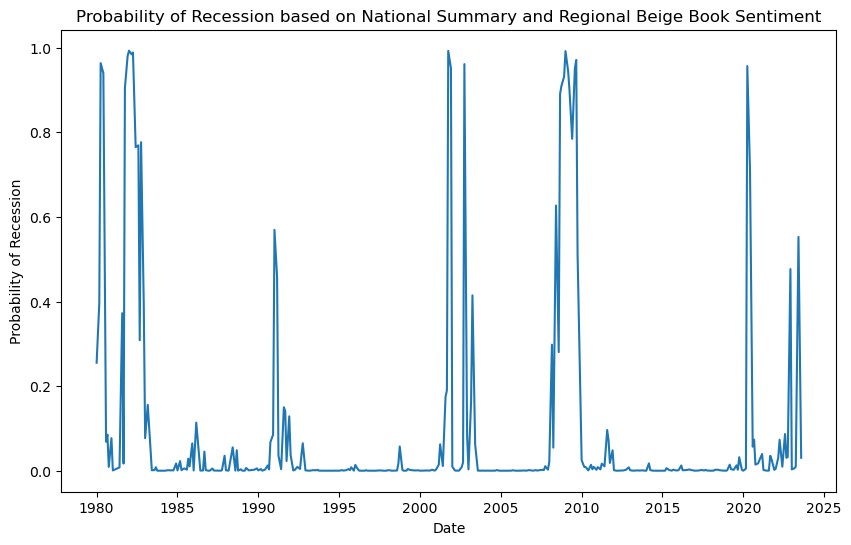

In [92]:
# This recreates Figure 2 from Filippou et al. (2024)
    # Clearly, sentiment from Beige Books is useful for predicting recessions

# Calculate probabilities from the logit model above
bbBinary['USPHCI_change_prob'] = model.predict(X)

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(bbBinary['Date'], bbBinary['USPHCI_change_prob'])
plt.xlabel('Date')
plt.ylabel('Probability of Recession')
plt.title('Probability of Recession based on National Summary and Regional Beige Book Sentiment')
plt.show()


In [86]:
# Same as above, but with only national summary predicting the binary outcome of USPHCI
# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
bbBinary = bbBinary.dropna()

# Define X and Y variables
X = bbBinary[['National Summary']]
X = sm.add_constant(X)
y = bbBinary['USPHCI_change']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

# In this case, the national summary sentiment score is a significant predictor of the change in the USPHCI.
    # It's not when included with all the regions
    # Need to think through this to expand on Filippou et al. (2024) Table 1, column 4

# Ran each region individually on July 7, 2024
    # San Francisco had the highest pseudo r-squared value at .52
    # For comparison, the national summary was .39
    # Is this just an oddity or is there something to it?

Optimization terminated successfully.
         Current function value: 0.188416
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          USPHCI_change   No. Observations:                  344
Model:                          Logit   Df Residuals:                      342
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.3912
Time:                        14:13:35   Log-Likelihood:                -64.815
converged:                       True   LL-Null:                       -106.46
Covariance Type:            nonrobust   LLR p-value:                 7.085e-20
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0011      0.317     -0.004      0.997      -0.623       0.621
National Summary   -27.6905      4.085     -6.779      0.000     -35.696     -19.685
====================================================================================
"""

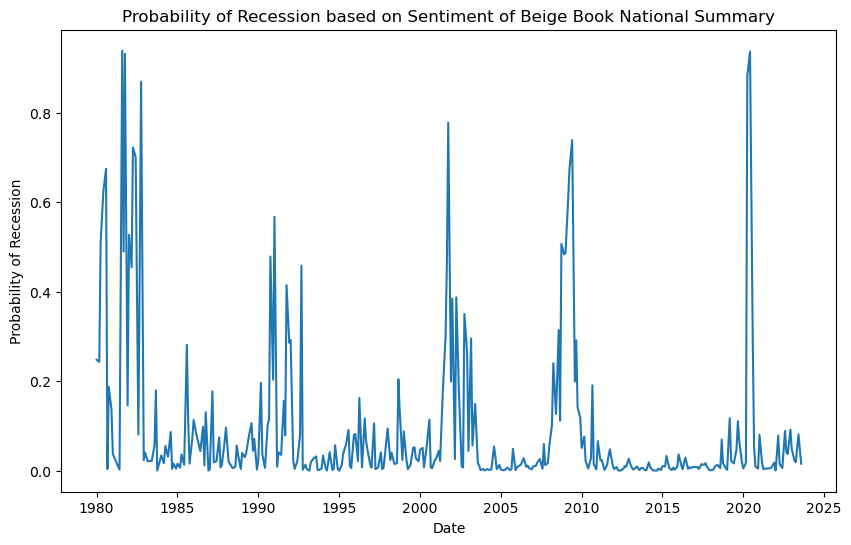

In [88]:
# This is the probablity of recession based only on the national summary
    # You can see it's much noisier than including the regional data

# Calculate probabilities from the logit model above
bbBinary['USPHCI_change_prob'] = model.predict(X)

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(bbBinary['Date'], bbBinary['USPHCI_change_prob'])
plt.xlabel('Date')
plt.ylabel('Probability of Recession')
plt.title('Probability of Recession based on Sentiment of Beige Book National Summary')
plt.show()


In [93]:
# Finally, doing it for just the regional data, not the national summary

# Drop all columns except for Date, District, and mean sentiment
bbBinary = bb[['Date', 'District', 'mean_sentiment']]

# Create columns for each district's sentiment score
bbBinary = pd.pivot_table(bbBinary, values='mean_sentiment', index='Date', columns='District')

# Rename columns
bbBinary.columns = ['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco', 'National Summary']

# Merge the Coincident Index data with the Beige Book sentiment data
bbBinary = data.merge(bbBinary, on='Date')
bbBinary.head()

# Create dummy variable for USPHCI that equals 1 if it decreased from the previous period
bbBinary['USPHCI_change'] = (bbBinary['USPHCI'] < bbBinary['USPHCI'].shift()).astype(int)

# Drop rows with missing values
bbBinary = bbBinary.dropna()

# Define X and Y variables
X = bbBinary[['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbBinary['USPHCI_change']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.091928
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          USPHCI_change   No. Observations:                  356
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                           12
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.6959
Time:                        14:15:49   Log-Likelihood:                -32.726
converged:                       True   LL-Null:                       -107.61
Covariance Type:            nonrobust   LLR p-value:                 6.316e-26
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7651      0.872      0.877      0.380      -0.944       2.474
Boston           -4.1313      6.007     -0.688      0.492     -15.904       7.642
New York        -11.3796      6.801     -1.673      0.094     -24.708       1.949
Philadelphia      0.7842      5.407      0.145      0.885      -9.813      11.381
Cleveland       -13.3012      5.786     -2.299      0.022     -24.641      -1.961
Richmond          7.8457      5.792      1.354      0.176      -3.507      19.199
Atlanta          -7.7535      5.493     -1.412      0.158     -18.519       3.012
Chicago          -4.3924      5.297     -0.829      0.407     -14.774       5.989
St. Louis        -4.9958      5.633     -0.887      0.375     -16.036       6.044
Minneapolis       4.1538      5.552      0.748      0.454      -6.728      15.035
Kansas City       1.6094      5.324      0.302      0.762      -8.825      12.044
Dallas           -2.8393      5.172     -0.549      0.583     -12.976       7.297
San Francisco   -20.6370      6.244     -3.305      0.001     -32.875      -8.399
=================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

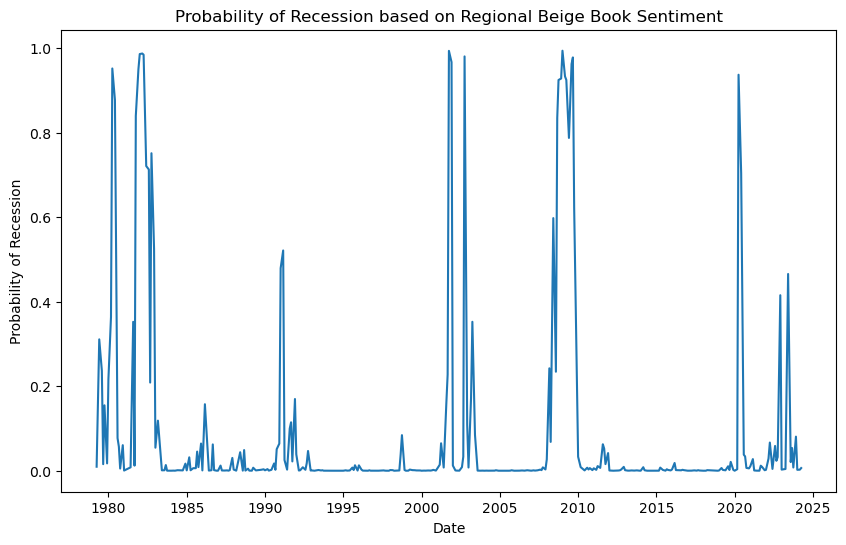

In [94]:
# This is the probablity of recession based only on the national summary
    # You can see it's much noisier than including the regional data

# Calculate probabilities from the logit model above
bbBinary['USPHCI_change_prob'] = model.predict(X)

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.plot(bbBinary['Date'], bbBinary['USPHCI_change_prob'])
plt.xlabel('Date')
plt.ylabel('Probability of Recession')
plt.title('Probability of Recession based on Regional Beige Book Sentiment')
plt.show()


# Lags of sentiment to predict recessions

This follows Filippou et al., 2024

In [48]:
# Create lags of dependent variable

# Create a three-month lead of the USPHCI_change variable
bbBinary['USPHCI_change_lead_3'] = bbBinary['USPHCI_change'].shift(3)

# Create a six-month lead of the USPHCI_change variable
bbBinary['USPHCI_change_lead_6'] = bbBinary['USPHCI_change'].shift(6)

# Create a three-month lag of the USPHCI_change variable
bbBinary['USPHCI_change_lag_3'] = bbBinary['USPHCI_change'].shift(-3)

# Create a six-month lag of the USPHCI_change variable
bbBinary['USPHCI_change_lag_6'] = bbBinary['USPHCI_change'].shift(-6)

In [56]:
# This is the same approach as Table 1, column 2 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
bbBinary = bbBinary.dropna()

# Define X and Y variables
X = bbBinary[['National Summary', 'Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbBinary['USPHCI_change_lag_6']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.210984
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     USPHCI_change_lag_6   No. Observations:                  344
Model:                           Logit   Df Residuals:                      330
Method:                            MLE   Df Model:                           13
Date:                 Sat, 06 Jul 2024   Pseudo R-squ.:                  0.2873
Time:                         17:33:12   Log-Likelihood:                -72.579
converged:                        True   LL-Null:                       -101.84
Covariance Type:             nonrobust   LLR p-value:                 9.672e-08
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5110      0.624     -0.818      0.413      -1.735       0.713
National Summary    -2.6713      4.702     -0.568      0.570     -11.887       6.545
Boston             -11.6464      4.098     -2.842      0.004     -19.679      -3.614
New York            -3.2349      4.048     -0.799      0.424     -11.169       4.700
Philadelphia         2.0596      4.322      0.477      0.634      -6.411      10.531
Cleveland            0.5423      3.423      0.158      0.874      -6.167       7.251
Richmond             0.4497      3.667      0.123      0.902      -6.738       7.638
Atlanta             -7.1031      3.132     -2.268      0.023     -13.243      -0.964
Chicago            -11.1912      3.913     -2.860      0.004     -18.860      -3.522
St. Louis           -2.0794      3.153     -0.660      0.510      -8.259       4.100
Minneapolis          1.0734      3.840      0.279      0.780      -6.454       8.600
Kansas City          5.2990      3.802      1.394      0.163      -2.152      12.750
Dallas               1.8573      3.638      0.510      0.610      -5.274       8.988
San Francisco        4.5241      3.133      1.444      0.149      -1.617      10.665
====================================================================================
"""

In [57]:
# This is the same approach as Table 1, column 3 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
bbBinary = bbBinary.dropna()

# Define X and Y variables
X = bbBinary[['National Summary', 'Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbBinary['USPHCI_change_lag_3']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.166601
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     USPHCI_change_lag_3   No. Observations:                  344
Model:                           Logit   Df Residuals:                      330
Method:                            MLE   Df Model:                           13
Date:                 Sat, 06 Jul 2024   Pseudo R-squ.:                  0.4498
Time:                         17:33:38   Log-Likelihood:                -57.311
converged:                        True   LL-Null:                       -104.17
Covariance Type:             nonrobust   LLR p-value:                 2.717e-14
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5554      0.647      0.859      0.390      -0.712       1.823
National Summary    -2.4108      5.266     -0.458      0.647     -12.731       7.910
Boston              -2.5863      4.296     -0.602      0.547     -11.007       5.834
New York            -8.7193      4.883     -1.786      0.074     -18.289       0.851
Philadelphia         2.5259      4.667      0.541      0.588      -6.622      11.674
Cleveland           -0.6522      3.872     -0.168      0.866      -8.241       6.936
Richmond            -8.4975      4.489     -1.893      0.058     -17.296       0.301
Atlanta             -4.6292      3.812     -1.214      0.225     -12.101       2.843
Chicago             -6.2979      4.184     -1.505      0.132     -14.498       1.903
St. Louis           -3.4731      3.580     -0.970      0.332     -10.491       3.545
Minneapolis         -7.4044      4.555     -1.626      0.104     -16.331       1.523
Kansas City         10.5351      4.518      2.332      0.020       1.679      19.391
Dallas              -3.5768      4.000     -0.894      0.371     -11.416       4.262
San Francisco       -2.3285      3.430     -0.679      0.497      -9.051       4.394
====================================================================================
"""

In [58]:
# This is the same approach as Table 1, column 5 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
bbBinary = bbBinary.dropna()

# Define X and Y variables
X = bbBinary[['National Summary', 'Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbBinary['USPHCI_change_lead_3']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.203769
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     USPHCI_change_lead_3   No. Observations:                  344
Model:                            Logit   Df Residuals:                      330
Method:                             MLE   Df Model:                           13
Date:                  Sat, 06 Jul 2024   Pseudo R-squ.:                  0.3416
Time:                          17:34:02   Log-Likelihood:                -70.097
converged:                         True   LL-Null:                       -106.46
Covariance Type:              nonrobust   LLR p-value:                 2.517e-10
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5349      0.618     -0.866      0.387      -1.746       0.676
National Summary    -2.6712      4.773     -0.560      0.576     -12.025       6.683
Boston              -1.9040      3.996     -0.476      0.634      -9.736       5.928
New York             2.5718      3.928      0.655      0.513      -5.127      10.270
Philadelphia        -0.4685      4.012     -0.117      0.907      -8.332       7.395
Cleveland           -9.5861      3.675     -2.609      0.009     -16.788      -2.384
Richmond             6.0862      3.625      1.679      0.093      -1.020      13.192
Atlanta             -1.6432      3.243     -0.507      0.612      -7.999       4.712
Chicago             -1.5325      3.686     -0.416      0.678      -8.758       5.693
St. Louis            1.0926      3.555      0.307      0.759      -5.875       8.061
Minneapolis          0.5993      3.949      0.152      0.879      -7.140       8.338
Kansas City          0.0773      3.728      0.021      0.983      -7.230       7.385
Dallas              -8.1651      3.719     -2.196      0.028     -15.454      -0.876
San Francisco       -6.9886      3.267     -2.139      0.032     -13.392      -0.586
====================================================================================
"""

In [59]:
# This is the same approach as Table 1, column 6 in Filippou et al. (2024): https://www.clevelandfed.org/publications/economic-commentary/2024/ec-202408-regional-economic-sentiment

# Run the regression
import statsmodels.api as sm

# Drop rows with missing values
bbBinary = bbBinary.dropna()

# Define X and Y variables
X = bbBinary[['National Summary', 'Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbBinary['USPHCI_change_lead_6']

# Fit the model with a logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

# It shouldn't be surprising that sentiment six-months in the future doesn't really predict a recession.
    # Don't really understand why Filippou et al. use future sentiment to predict current recession
    # Their approach makes perfect sense for using current sentiment to predict future recession, of course

Optimization terminated successfully.
         Current function value: 0.245064
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     USPHCI_change_lead_6   No. Observations:                  344
Model:                            Logit   Df Residuals:                      330
Method:                             MLE   Df Model:                           13
Date:                  Sat, 06 Jul 2024   Pseudo R-squ.:                  0.2081
Time:                          17:34:13   Log-Likelihood:                -84.302
converged:                         True   LL-Null:                       -106.46
Covariance Type:              nonrobust   LLR p-value:                 2.719e-05
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5067      0.600     -2.512      0.012      -2.682      -0.331
National Summary     1.5493      4.320      0.359      0.720      -6.918      10.016
Boston              12.5814      4.185      3.007      0.003       4.380      20.783
New York             4.7134      3.544      1.330      0.184      -2.233      11.659
Philadelphia        -4.4596      3.716     -1.200      0.230     -11.743       2.824
Cleveland           -5.0093      3.108     -1.612      0.107     -11.101       1.083
Richmond             3.6196      3.256      1.112      0.266      -2.762      10.001
Atlanta             -4.9738      2.847     -1.747      0.081     -10.554       0.606
Chicago              0.6744      3.316      0.203      0.839      -5.826       7.174
St. Louis           -1.4945      3.067     -0.487      0.626      -7.505       4.516
Minneapolis         -0.1588      3.629     -0.044      0.965      -7.272       6.954
Kansas City         -8.3548      3.507     -2.382      0.017     -15.228      -1.481
Dallas               1.4688      3.276      0.448      0.654      -4.953       7.890
San Francisco       -8.2643      2.898     -2.852      0.004     -13.944      -2.585
====================================================================================
"""

## Regress national sentiment on regional sentiments

This follows Table 1, Column 1 in Filippou et al. (2024)

In [54]:
# Regress USPHCI on sentiment data
import statsmodels.api as sm

# Drop rows with missing values
bbSentiment = bbSentiment.dropna()

# Define X and Y variables
X = bbSentiment[['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bbSentiment['National Summary']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       National Summary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     35.13
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.38e-52
Time:                        17:29:23   Log-Likelihood:                 569.14
No. Observations:                 356   AIC:                            -1112.
Df Residuals:                     343   BIC:                            -1062.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0044      0.009     -0.515      0.607      -0.021       0.012
Boston            0.0243      0.048      0.504      0.615      -0.071       0.119
New York          0.1221      0.042      2.882      0.004       0.039       0.205
Philadelphia      0.0826      0.046      1.814      0.071      -0.007       0.172
Cleveland         0.0898      0.041      2.209      0.028       0.010       0.170
Richmond          0.0497      0.043      1.155      0.249      -0.035       0.134
Atlanta           0.1168      0.038      3.041      0.003       0.041       0.192
Chicago           0.0949      0.043      2.221      0.027       0.011       0.179
St. Louis         0.0304      0.040      0.750      0.454      -0.049       0.110
Minneapolis       0.1084      0.045      2.425      0.016       0.020       0.196
Kansas City       0.1247      0.043      2.879      0.004       0.039       0.210
Dallas            0.1343      0.043      3.122      0.002       0.050       0.219
San Francisco     0.0918      0.036      2.586      0.010       0.022       0.162
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.561
Skew:                           0.090   Prob(JB):                        0.102
Kurtosis:                       3.524   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Principal Component Analysis

The goal here is to calculate one score for each district using all of the available sentiment measures.

Ideally, this score would be a better predictor of recessions than just mean sentiment, which we used above.

However, the results below show an pseudo R-squared of .59 when PCA values are used for each district, compared to .696 for mean sentiment. If mean sentiment works better, and is simpler, use it!

(But I'm leaving the results below just in case I want to come back to PCA sometime with this data. -- CS, 7/9/24)

In [3]:
# Drop all columns except for Date, District, and sentiment measures
bbPCA = bb[['Date', 'District', 'mean_sentiment','compound_score', 'median_sentiment', 'IQR_sentiment', 'sentiment_trigram', 'variance_sentiment']]

# Create columns for each district's sentiment score
bbPCA = pd.pivot_table(bbPCA, values=['mean_sentiment','compound_score', 'median_sentiment', 'IQR_sentiment', 'sentiment_trigram', 'variance_sentiment'], index='Date', columns='District')

# rename columns based on district and the sentiment measure
# For example, column 1 is IQR_sentiment for Boston, column 2 is IQR_sentiment for New York, etc.
# Make sure the districts line up with the correct variable name. IQR_sentiment is first, then compound_score, mean, median, trigram, and variance is last
bbPCA.columns = ['Boston_IQR', 'New York_IQR', 'Philadelphia_IQR', 'Cleveland_IQR', 'Richmond_IQR', 'Atlanta_IQR', 'Chicago_IQR', 'St. Louis_IQR', 'Minneapolis_IQR', 'Kansas City_IQR', 'Dallas_IQR', 'San Francisco_IQR', 'National Summary_IQR',
                 'Boston_compound', 'New York_compound', 'Philadelphia_compound', 'Cleveland_compound', 'Richmond_compound', 'Atlanta_compound', 'Chicago_compound', 'St. Louis_compound', 'Minneapolis_compound', 'Kansas City_compound', 'Dallas_compound', 'San Francisco_compound', 'National Summary_compound',
                 'Boston_mean', 'New York_mean', 'Philadelphia_mean', 'Cleveland_mean', 'Richmond_mean', 'Atlanta_mean', 'Chicago_mean', 'St. Louis_mean', 'Minneapolis_mean', 'Kansas City_mean', 'Dallas_mean', 'San Francisco_mean', 'National Summary_mean',
                 'Boston_median', 'New York_median', 'Philadelphia_median', 'Cleveland_median', 'Richmond_median', 'Atlanta_median', 'Chicago_median', 'St. Louis_median', 'Minneapolis_median', 'Kansas City_median', 'Dallas_median', 'San Francisco_median', 'National Summary_median',
                 'Boston_trigram', 'New York_trigram', 'Philadelphia_trigram', 'Cleveland_trigram', 'Richmond_trigram', 'Atlanta_trigram', 'Chicago_trigram', 'St. Louis_trigram', 'Minneapolis_trigram', 'Kansas City_trigram', 'Dallas_trigram', 'San Francisco_trigram', 'National Summary_trigram',
                 'Boston_variance', 'New York_variance', 'Philadelphia_variance', 'Cleveland_variance', 'Richmond_variance', 'Atlanta_variance', 'Chicago_variance', 'St. Louis_variance', 'Minneapolis_variance', 'Kansas City_variance', 'Dallas_variance', 'San Francisco_variance', 'National Summary_variance']

# Drop missing values
bbPCA = bbPCA.dropna()

In [4]:
# Create new dataframes for each district
bbBostonPCA = bbPCA[['Boston_IQR', 'Boston_compound', 'Boston_mean', 'Boston_median', 'Boston_trigram', 'Boston_variance']]
bbNewYorkPCA = bbPCA[['New York_IQR', 'New York_compound', 'New York_mean', 'New York_median', 'New York_trigram', 'New York_variance']]
bbPhiladelphiaPCA = bbPCA[['Philadelphia_IQR', 'Philadelphia_compound', 'Philadelphia_mean', 'Philadelphia_median', 'Philadelphia_trigram', 'Philadelphia_variance']]
bbClevelandPCA = bbPCA[['Cleveland_IQR', 'Cleveland_compound', 'Cleveland_mean', 'Cleveland_median', 'Cleveland_trigram', 'Cleveland_variance']]
bbRichmondPCA = bbPCA[['Richmond_IQR', 'Richmond_compound', 'Richmond_mean', 'Richmond_median', 'Richmond_trigram', 'Richmond_variance']]
bbAtlantaPCA = bbPCA[['Atlanta_IQR', 'Atlanta_compound', 'Atlanta_mean', 'Atlanta_median', 'Atlanta_trigram', 'Atlanta_variance']]
bbChicagoPCA = bbPCA[['Chicago_IQR', 'Chicago_compound', 'Chicago_mean', 'Chicago_median', 'Chicago_trigram', 'Chicago_variance']]
bbStLouisPCA = bbPCA[['St. Louis_IQR', 'St. Louis_compound', 'St. Louis_mean', 'St. Louis_median', 'St. Louis_trigram', 'St. Louis_variance']]
bbMinneapolisPCA = bbPCA[['Minneapolis_IQR', 'Minneapolis_compound', 'Minneapolis_mean', 'Minneapolis_median', 'Minneapolis_trigram', 'Minneapolis_variance']]
bbKansasCityPCA = bbPCA[['Kansas City_IQR', 'Kansas City_compound', 'Kansas City_mean', 'Kansas City_median', 'Kansas City_trigram', 'Kansas City_variance']]
bbDallasPCA = bbPCA[['Dallas_IQR', 'Dallas_compound', 'Dallas_mean', 'Dallas_median', 'Dallas_trigram', 'Dallas_variance']]
bbSanFranciscoPCA = bbPCA[['San Francisco_IQR', 'San Francisco_compound', 'San Francisco_mean', 'San Francisco_median', 'San Francisco_trigram', 'San Francisco_variance']]
bbNationalSummaryPCA = bbPCA[['National Summary_IQR', 'National Summary_compound', 'National Summary_mean', 'National Summary_median', 'National Summary_trigram', 'National Summary_variance']]

In [5]:
# For each district, run a PCA on the sentiment measures
from sklearn.decomposition import PCA

# Function to run PCA on a dataframe
def run_pca(data, district_name):
    # Create the PCA object
    pca = PCA(n_components=1)
    
    # Fit the PCA model
    pca.fit(data)
    
    # Get the principal components
    principal_components = pca.transform(data)
    
    # Create a new dataframe with the principal components
    principal_df = pd.DataFrame(data=principal_components, columns=['principal_component'])
    
    # Add the Date column back to the dataframe
    principal_df['Date'] = data.index
    
    # Add the District column
    principal_df['District'] = district_name
    
    return principal_df

# Run PCA on each district's sentiment measures
boston_pca = run_pca(bbBostonPCA, 'Boston')
new_york_pca = run_pca(bbNewYorkPCA, 'New York')
philadelphia_pca = run_pca(bbPhiladelphiaPCA, 'Philadelphia')
cleveland_pca = run_pca(bbClevelandPCA, 'Cleveland')
richmond_pca = run_pca(bbRichmondPCA, 'Richmond')
atlanta_pca = run_pca(bbAtlantaPCA, 'Atlanta')
chicago_pca = run_pca(bbChicagoPCA, 'Chicago')
st_louis_pca = run_pca(bbStLouisPCA, 'St. Louis')
minneapolis_pca = run_pca(bbMinneapolisPCA, 'Minneapolis')
kansas_city_pca = run_pca(bbKansasCityPCA, 'Kansas City')
dallas_pca = run_pca(bbDallasPCA, 'Dallas')
san_francisco_pca = run_pca(bbSanFranciscoPCA, 'San Francisco')
national_summary_pca = run_pca(bbNationalSummaryPCA, 'National Summary')

# Combine all the PCA results into one dataframe
pca_results = pd.concat([boston_pca, new_york_pca, philadelphia_pca, cleveland_pca, richmond_pca, atlanta_pca, chicago_pca, st_louis_pca, minneapolis_pca, kansas_city_pca, dallas_pca, san_francisco_pca, national_summary_pca])

In [6]:
# Pivot the data to have the principal components as columns
pca_results = pd.pivot_table(pca_results, values='principal_component', index='Date', columns='District')

# Merge the Coincident Index data with the PCA results
bb_PCA_merged = data.merge(pca_results, on='Date')

# Calculate dummy for USPHCI_change that equals 1 if it decreased from the previous period
bb_PCA_merged['USPHCI_change'] = (bb_PCA_merged['USPHCI'] < bb_PCA_merged['USPHCI'].shift()).astype(int)
bb_PCA_merged.head()


,Date,USPHCI,Atlanta,Boston,Chicago,Cleveland,Dallas,Kansas City,Minneapolis,National Summary,New York,Philadelphia,Richmond,San Francisco,St. Louis,USPHCI_change
0,1979-04-01,46.07,1.782921,0.068357,0.098499,0.584023,-0.163106,-0.139017,1.867099,-0.106617,-0.173014,0.021185,-0.077322,-0.241817,-0.029860,0
1,1979-06-01,46.42,0.063238,1.216998,-0.035779,1.854390,-0.160215,-0.111381,-0.098326,-0.092219,-0.189843,1.926161,1.761101,-0.037343,-0.064535,0
2,1979-08-01,46.58,-0.118234,1.828154,-0.099824,-0.096423,-0.188388,-0.129835,1.884419,-0.062744,0.660581,1.203907,-0.060879,1.683014,-0.150246,0
3,1979-09-01,46.68,-0.107889,1.868866,1.861307,-0.082185,-0.145096,-0.037746,1.878077,0.291663,-0.160139,0.095509,-0.049284,-0.198098,-0.067818,0
4,1979-10-01,46.77,1.850655,-0.084128,0.571950,-0.137923,-0.158938,-0.105465,-0.086941,1.625480,-0.108903,0.143666,0.081667,1.746855,-0.093468,0


In [7]:
# Regress USPHCI on sentiment data
import statsmodels.api as sm

# Drop rows with missing values
bb_PCA_merged = bb_PCA_merged.dropna()

# Define X and Y variables
X = bb_PCA_merged[['Boston', 'New York', 'Philadelphia', 'Cleveland', 'Richmond', 'Atlanta', 'Chicago', 'St. Louis', 'Minneapolis', 'Kansas City', 'Dallas', 'San Francisco']]
X = sm.add_constant(X)
y = bb_PCA_merged['USPHCI_change']

# Fit the model using logistic regression
model = sm.Logit(y, X).fit()

# Print the summary
model.summary()

Optimization terminated successfully.
         Current function value: 0.122880
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          USPHCI_change   No. Observations:                  356
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                           12
Date:                Tue, 09 Jul 2024   Pseudo R-squ.:                  0.5935
Time:                        15:50:08   Log-Likelihood:                -43.745
converged:                       True   LL-Null:                       -107.61
Covariance Type:            nonrobust   LLR p-value:                 1.760e-21
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.7562      0.428     -8.776      0.000      -4.595      -2.917
Boston            0.6141      0.553      1.111      0.267      -0.470       1.698
New York          1.2147      0.430      2.823      0.005       0.371       2.058
Philadelphia     -0.8548      1.402     -0.610      0.542      -3.603       1.893
Cleveland         1.5462      0.572      2.705      0.007       0.426       2.667
Richmond         -0.6179      0.696     -0.887      0.375      -1.983       0.747
Atlanta           0.7284      0.465      1.565      0.118      -0.184       1.641
Chicago           0.6208      0.501      1.239      0.215      -0.361       1.603
St. Louis         0.5813      0.698      0.832      0.405      -0.787       1.950
Minneapolis      -0.0047      0.589     -0.008      0.994      -1.159       1.149
Kansas City      -1.2062      0.676     -1.785      0.074      -2.531       0.118
Dallas            0.5454      0.396      1.377      0.169      -0.231       1.322
San Francisco     1.4829      0.405      3.660      0.000       0.689       2.277
=================================================================================
"""